# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [90]:
import os 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [91]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ceux", "quelques", "rue", "mois"]
sw = set(sw)

In [92]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

201 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'ceux', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mois', 'mon', 'même', 

## Tokeniser

In [93]:
# Récupération du contenu du fichier
path = "../data/camille_Crise_economique/KB_JB838_1929-06-01_01-00001.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [94]:
# Lister les Fichiers
data_path = "../data/camille_Crise_economique/"
files = os.listdir(data_path)

In [95]:
#Tokenization de tous les documents 
words = []
for f in sorted(files)[:3]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    words += nltk.wordpunct_tokenize(text)
    print(f"{len(words)} words found")

6739 words found
13142 words found
24091 words found


In [96]:
words[:10]

['a', '*’', 'CW', "'-", 'tm', 'p', '^', '•‘•"', "'", ';']

## Calculer la taille du vocabulaire

In [97]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

9152 words kept (4795 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [98]:
fdist = nltk.FreqDist(kept)
fdist.most_common(50)

[('pays', 33),
 ('nouvelle', 32),
 ('ministre', 31),
 ('février', 29),
 ('leurs', 26),
 ('premier', 23),
 ('soir', 23),
 ('comité', 23),
 ('etats', 22),
 ('gouvernement', 21),
 ('économique', 21),
 ('avant', 21),
 ('commission', 21),
 ('belge', 20),
 ('europe', 20),
 ('londres', 19),
 ('lieu', 19),
 ('président', 19),
 ('conférence', 19),
 ('belgique', 18),
 ('juin', 18),
 ('bruxelles', 18),
 ('cours', 17),
 ('conseil', 17),
 ('situation', 17),
 ('prince', 17),
 ('crise', 16),
 ('nouveau', 16),
 ('chambre', 16),
 ('unis', 16),
 ('francs', 16),
 ('nationale', 15),
 ('politique', 15),
 ('ordre', 14),
 ('vers', 14),
 ('guerre', 14),
 ('question', 14),
 ('paris', 13),
 ('partie', 13),
 ('part', 13),
 ('ans', 13),
 ('très', 13),
 ('toute', 13),
 ('travail', 13),
 ('production', 13),
 ('prix', 12),
 ('moment', 12),
 ('peu', 12),
 ('dès', 12),
 ('point', 12)]

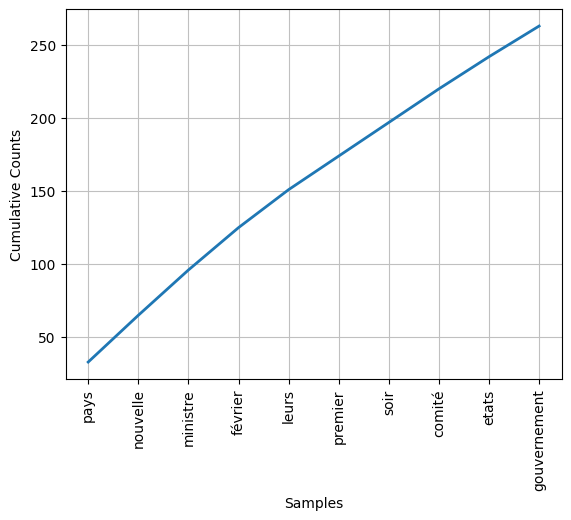

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [99]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [100]:
fdist.hapaxes()[:30]

['iïifw',
 'ywwïis',
 'rfytjfrtfiyprfç',
 'mït',
 'notl',
 'irowmon',
 'ptovinca',
 'moii',
 'nenaee',
 'otnm',
 'hfaila',
 'unan',
 'porta',
 'rédactions',
 'téijê',
 'hones',
 'imprimées',
 'chèque',
 'rédaction',
 'lçuvaio',
 'roaael',
 'fila',
 'fleef',
 'penser',
 'réoente',
 'consultation',
 'électorale',
 'écris',
 'eont',
 'précisés']

## Trouver les mots les plus longs du corpus

In [101]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['exceptionnellement',
 'extraordinairement',
 'vraisemblablement',
 'cinématographique',
 'désintéressement',
 'particulièrement',
 'décentralisation',
 'révolutionnaires',
 'princersouverain',
 'applaudissements',
 'intervertissions',
 'considérablement',
 'progressivement',
 'incompatibilité',
 'révolutionnaire',
 'transformations',
 'administrations',
 'rfytjfrtfiyprfç',
 'professionnelle',
 'malheureusement',
 'caractéristique',
 'contradictoires',
 'représentations',
 'exceptionnelles',
 'oatégoriquement',
 'internationales',
 'gouvernementale',
 'personnellement',
 'catsgorioucnvmr',
 'responsabilités']